### Here is where we clean our data for training the LLM Model
- Reference Article https://www.kaggle.com/code/kirollosashraf/phishing-email-detection-using-deep-learning

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv("./phishingemails/Phishing_Email.csv")

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [22]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [23]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [24]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [25]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


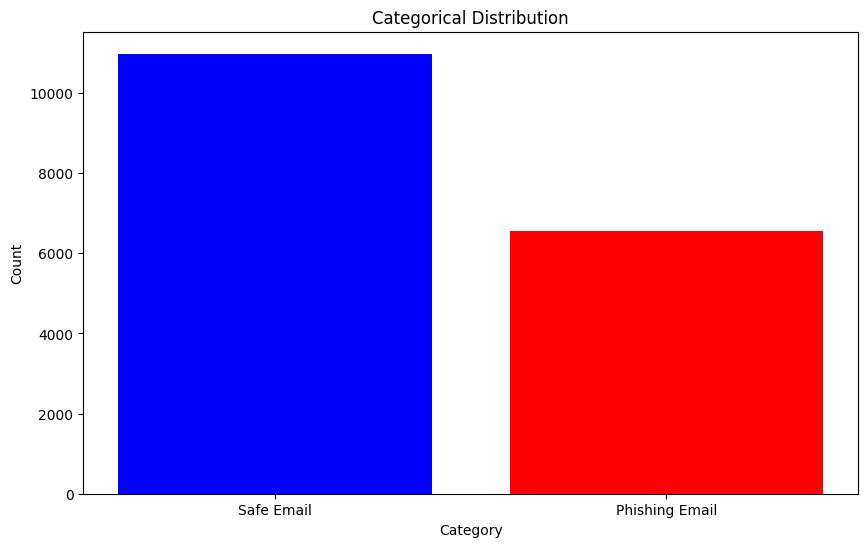

In [26]:
# Assuming df is your DataFrame
email_type_counts = df['Email Type'].value_counts()

# Plotting with matplotlib
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(email_type_counts.index, email_type_counts.values, color=['blue', 'red'])
plt.xlabel('Category')  # X-axis label
plt.ylabel('Count')     # Y-axis label
plt.title('Categorical Distribution')  # Title of the plot

# Show the plot
plt.show()

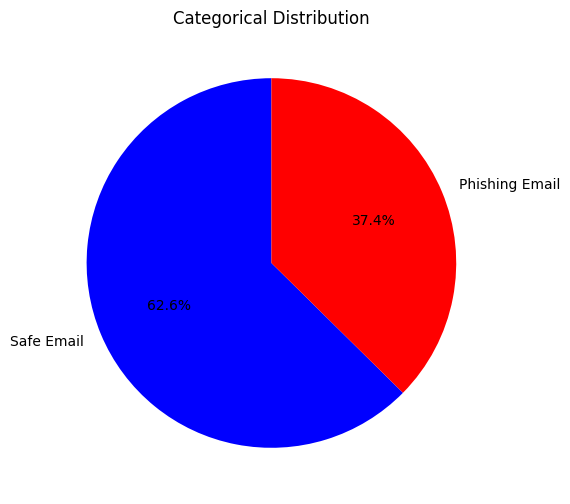

In [27]:
# Calculate value counts for 'Email Type'
email_type_counts = df['Email Type'].value_counts()

# Plotting with matplotlib
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(email_type_counts.values, labels=email_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Categorical Distribution')  # Title of the plot

# Show the pie chart
plt.show()

In [28]:


le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18644,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18645,date a lonely housewife always wanted to date ...,0
18646,request submitted : access request for anita ....,1
18647,"re : important - prc mtg hi dorn & john , as y...",1


### Remove uneeded characters like HTML,Extra Spaces, and hyperlinks

In [29]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [30]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


### Save Clean Data

In [31]:

df.to_csv('phishingemails/cleandata.csv', index=True)

: 